In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

from np_davidson import smallest_eig

In [2]:
class NearlyDiagMatrix:
    def __init__(self, dim: int, delta: int):
        assert delta >= 0
        assert dim - delta > 0
        self.diag = np.random.normal(size=dim)
        self.sub_diag = np.random.normal(size=dim - delta)
        self.delta = delta

    def dot(self, vec: npt.NDArray) -> npt.NDArray:
        result = vec * self.diag
        result[self.delta:] += vec[:-self.delta] * self.sub_diag
        result[:-self.delta] += vec[self.delta:] * self.sub_diag
        return result

    def to_dense(self) -> npt.NDArray:
        return (
            np.diag(self.diag)
            + np.diag(self.sub_diag, self.delta)
            + np.diag(self.sub_diag, -self.delta)
        )

A = NearlyDiagMatrix(1000, 2)
A_dense = A.to_dense()
vec = np.random.normal(size=len(A.diag))
np.allclose((A_dense @ vec), A.dot(vec))

True

(Converged at step 29)


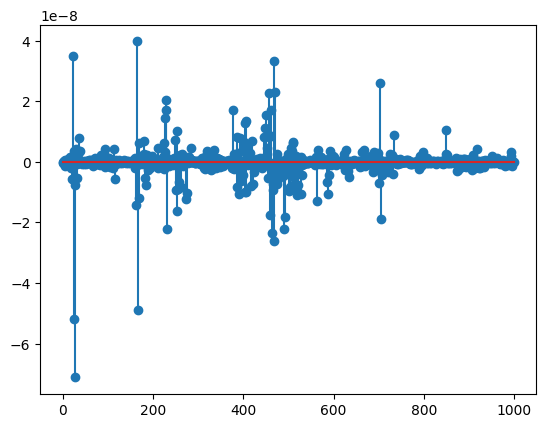

In [7]:
dim = 1000
delta = 2
A = NearlyDiagMatrix(dim, delta)

def pos_phase(vec, idx=None):
    assert vec.ndim == 1
    if idx is None:
        idx = np.abs(vec).argmax()

    result = vec
    if vec[idx] < 0:
        result = -vec
    return result, idx

true_eigval, true_eigvec = np.linalg.eigh(A.to_dense())
true_eigval = true_eigval[0]
true_eigvec, phase_idx = pos_phase(true_eigvec[:, 0])

eigval, eigvec = smallest_eig(A.dot, A.diag, max_steps=40, verbose=True)
eigvec = pos_phase(eigvec, phase_idx)[0]

plt.stem(eigvec - true_eigvec);


In [14]:
from time import perf_counter
from tqdm.auto import tqdm, trange

dims = [100, 500, 1000, 3000, 5000, 10000, 20000]

nreps = 100
delta = 2

times = []
for dim in dims:
    print(f"working on size {dim}")
    times.append([])
    for _ in trange(nreps):
        A = NearlyDiagMatrix(dim, delta)

        t0 = perf_counter()
        eigval, eigvec = smallest_eig(A.dot, A.diag, max_steps=40)
        t1 = perf_counter()
        times[-1].append(t1 - t0)

times = np.array(times)

working on size 100


  0%|          | 0/100 [00:00<?, ?it/s]

working on size 500


  0%|          | 0/100 [00:00<?, ?it/s]

working on size 1000


  0%|          | 0/100 [00:00<?, ?it/s]

working on size 3000


  0%|          | 0/100 [00:00<?, ?it/s]

working on size 5000


  0%|          | 0/100 [00:00<?, ?it/s]

working on size 10000


  0%|          | 0/100 [00:00<?, ?it/s]

working on size 20000


  0%|          | 0/100 [00:00<?, ?it/s]

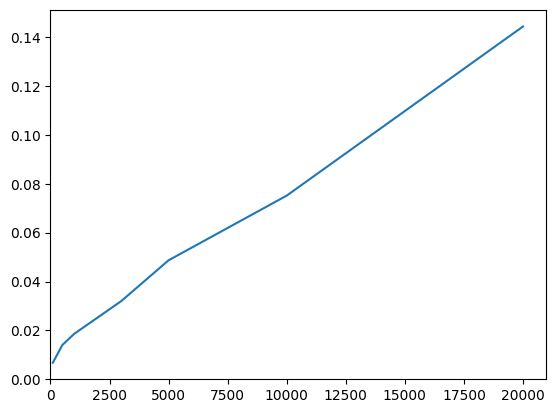

In [15]:
plt.plot(dims, times.mean(axis=1));
plt.ylim(bottom=0)
plt.xlim(left=0);